In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cvx.retirement.simulation import simulate, Parameters, Limits
from cvx.retirement.visualize import plot_ecdf

sns.set_theme(font_scale=1.5, style='whitegrid')

%load_ext autoreload
%autoreload 2

# Global variables

In [2]:
age_start = 65
age_end = 119

w_stocks_B = 0.2
w_stocks_I = 0.6
w_stocks_R = 0.6

rho_B = 1.033
rho_I = 1.057
rho_R = 1.057

# Paremeters

In [3]:
sex = 'F'

B_init = 200.
I_init = 400.
R_init = 200.

capital_tax_rate = 0.15

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 3.938 * 12

c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters = Parameters(
    B_init=B_init,
    I_init=I_init,
    R_init=R_init,
    age_start=age_start,
    age_end=age_end,
    w_stocks_B=w_stocks_B,
    w_stocks_I=w_stocks_I,
    w_stocks_R=w_stocks_R,
    rho_B=rho_B,
    rho_I=rho_I,
    rho_R=rho_R,
    a=a,
    c0=c0,
    sex=sex,
)

results_MPC = simulate(parameters, n_sims=1_000, algo='MPC', seed=9)
results_4p = simulate(parameters, n_sims=1_000, algo='4_percent', seed=9)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.48it/s]


In [4]:
save = 'upper'
if save:
    results_MPC.ret_adj_matrix_B.to_csv('cache/results_MPC_ret_adj_B.csv')
    results_MPC.ret_adj_matrix_I.to_csv('cache/results_MPC_ret_adj_I.csv')
    results_MPC.ret_adj_matrix_R.to_csv('cache/results_MPC_ret_adj_R.csv')

    results_MPC.q.to_csv(f'cache/MPC_{save}_bequests.csv')
    pd.Series(results_MPC.c_matrix.values.flatten()).to_csv(f'cache/MPC_{save}_cash.csv')

0.00    0.78
0.01    0.95
0.05    1.00
0.25    1.00
0.50    1.00
0.75    1.00
0.95    1.00
0.99    1.00
1.00    1.25
dtype: float64
0.00           0.42
0.01           0.58
0.05           0.84
0.25           0.98
0.50           1.06
0.75           1.16
0.95           1.33
0.99           4.21
1.00    74815969.12
dtype: float64


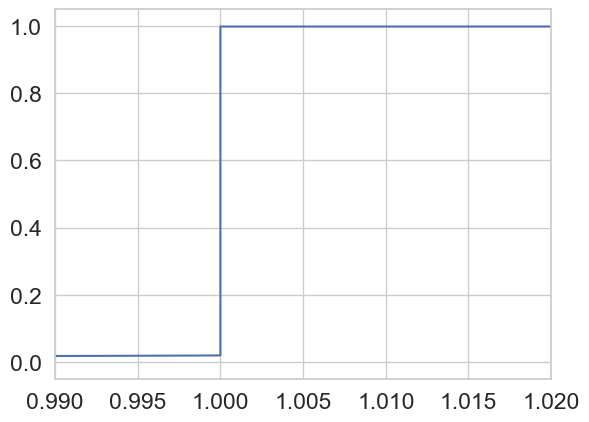

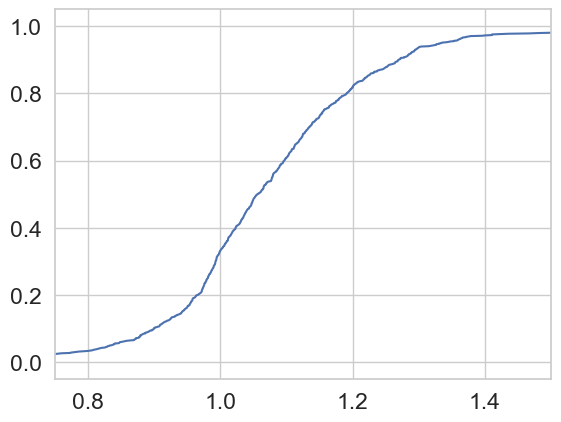

In [ ]:
save=False

c_relative = pd.Series((results_MPC.c_matrix / results_4p.c_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((results_MPC.q / results_4p.q).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))

MPC


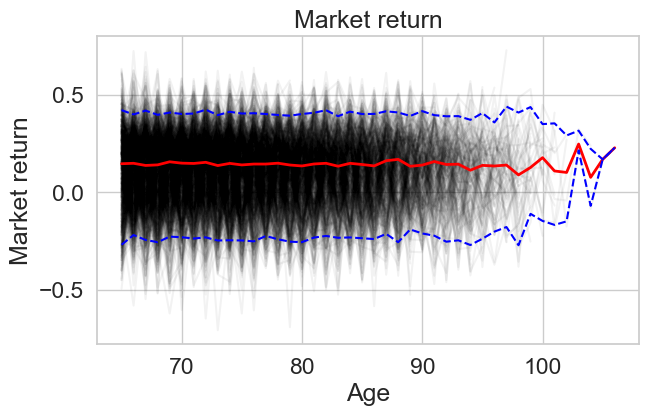

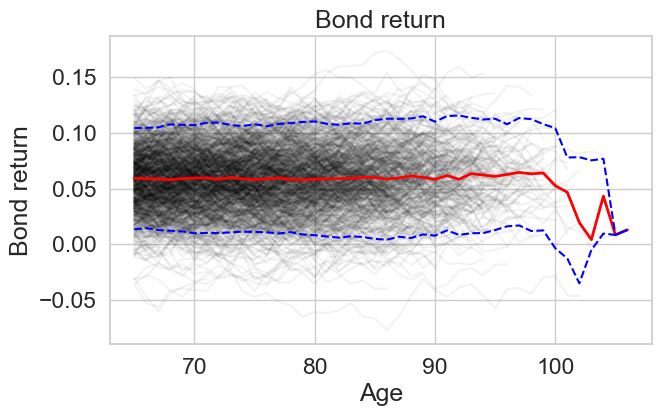

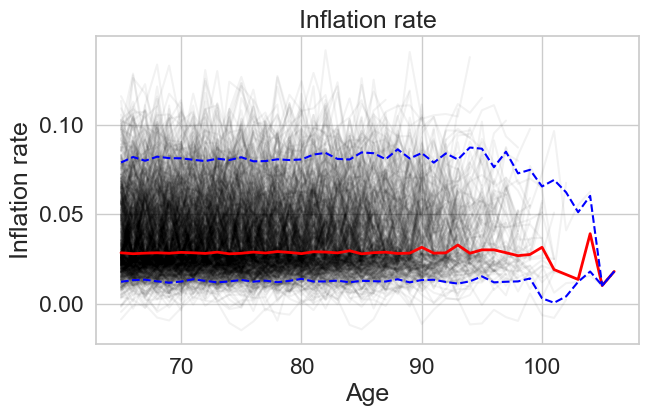

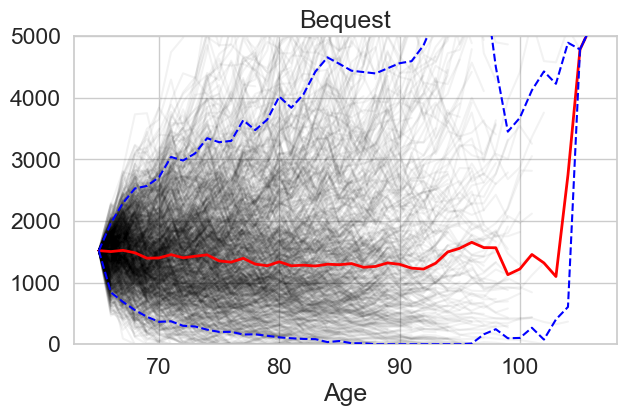

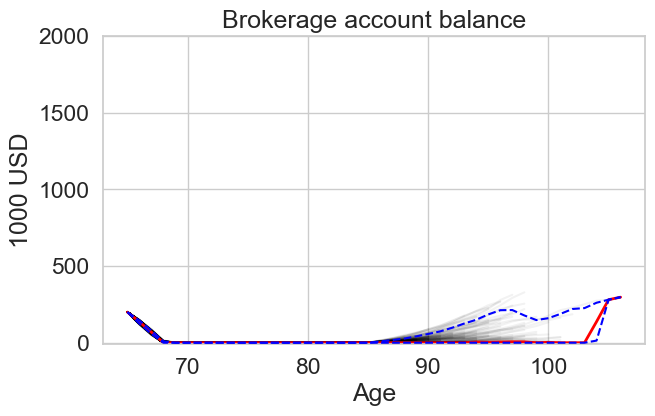

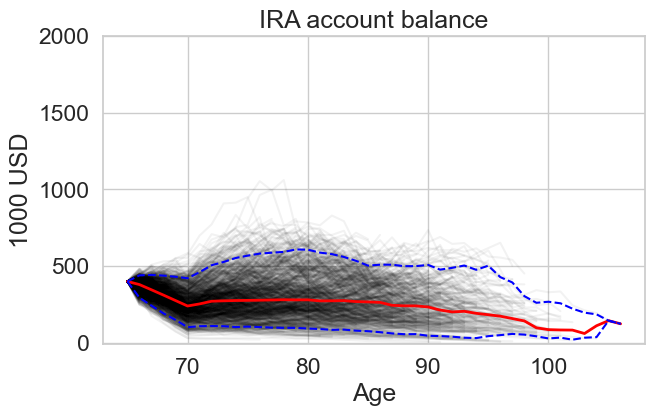

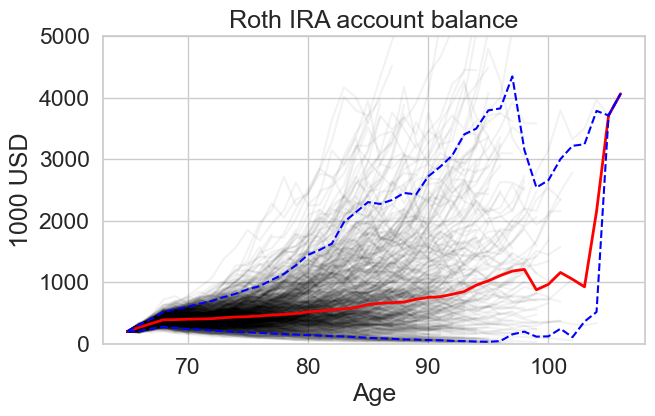

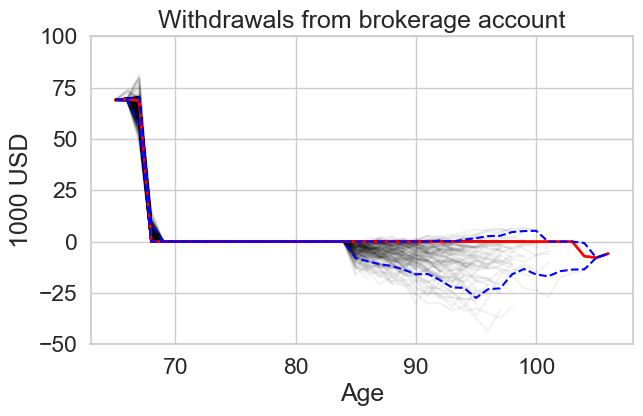

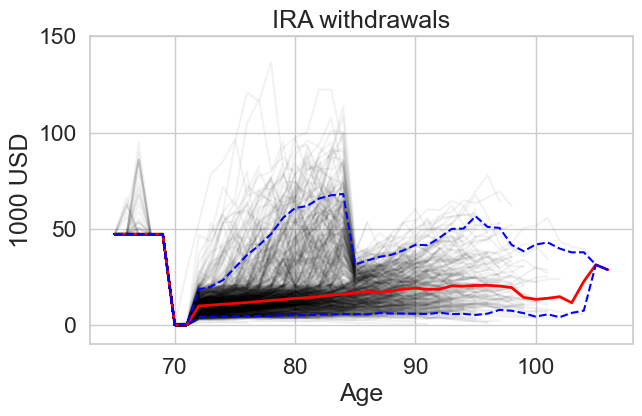

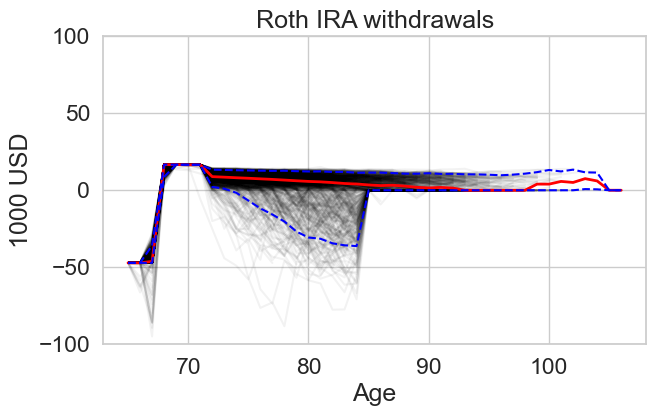

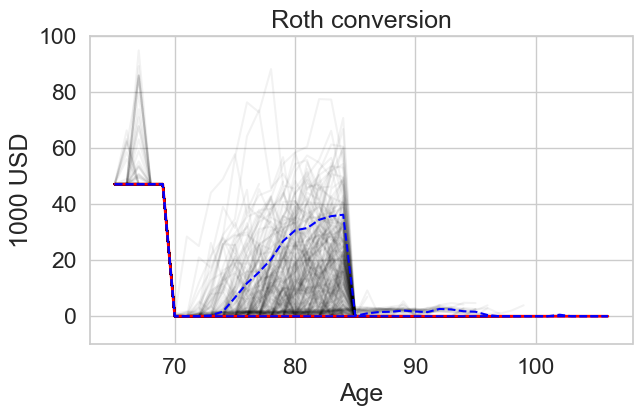

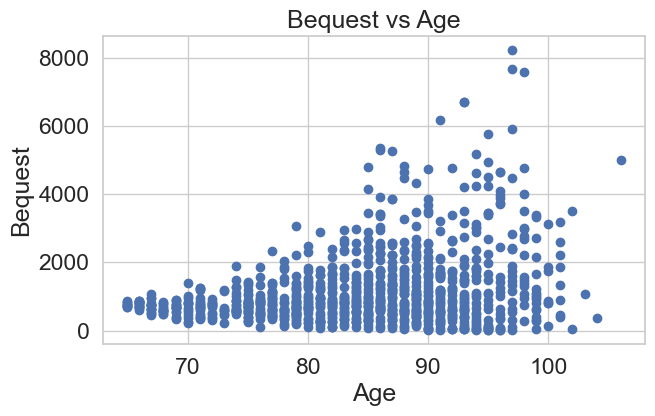

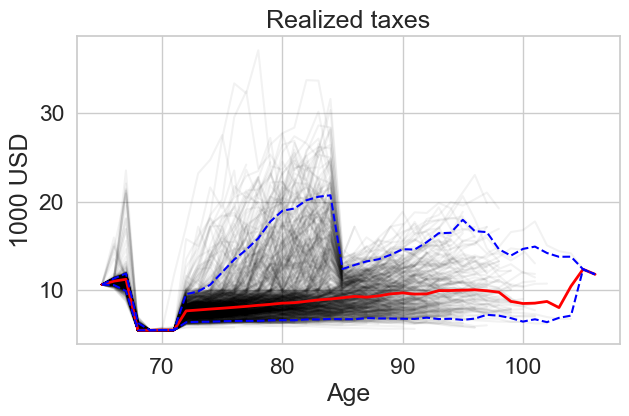

In [6]:
save_dir = '/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/'
limits = Limits(
    B_min=-10,
    B_max=2000,
    I_min=-10,
    I_max=2000,
    R_min=-10,
    R_max=5000,
    b_min=-50,
    b_max=100,
    i_min=-10,
    i_max=150,
    r_min=-100,
    r_max=100,
    r_c_min=-10,
    r_c_max=100,
    q_max=5000,
)
print('MPC')
save = 'MPC_upper'
results_MPC.summarize(limits=limits, save=None, save_dir=False)

4%


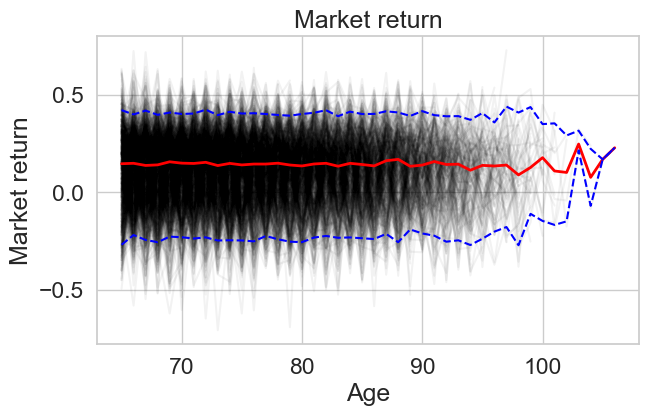

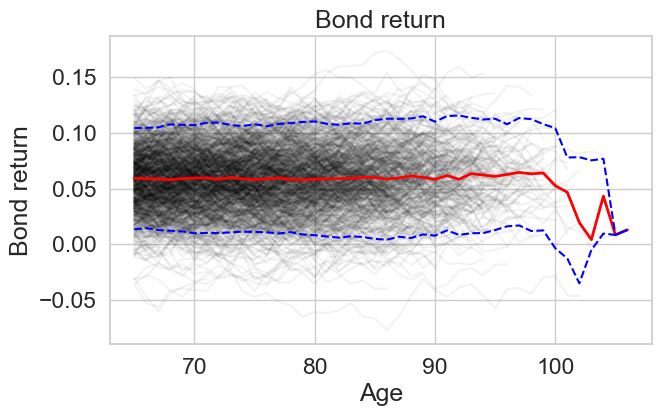

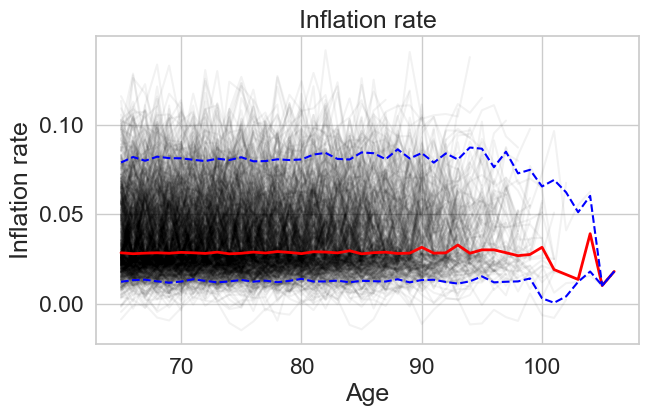

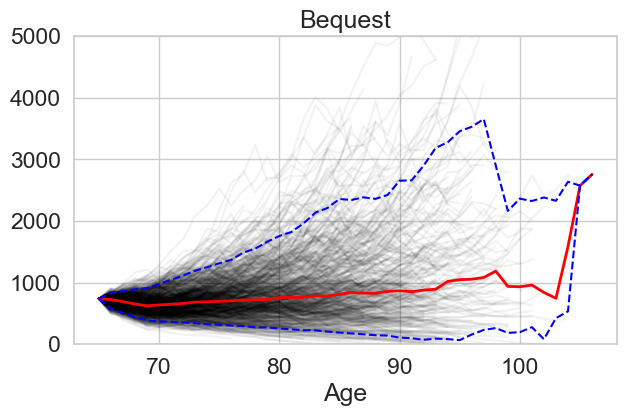

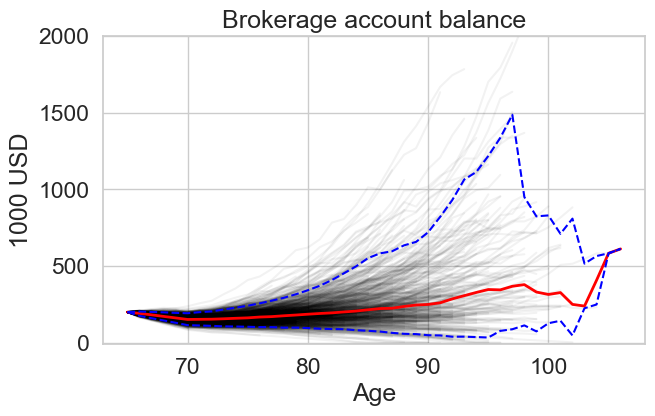

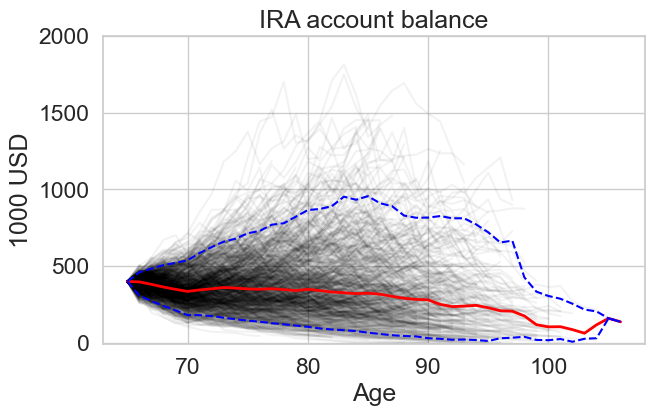

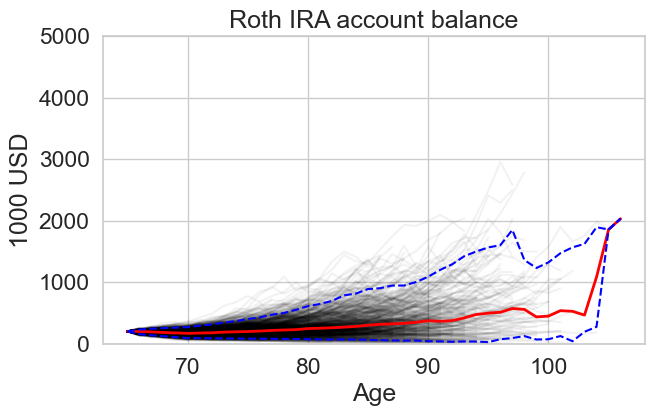

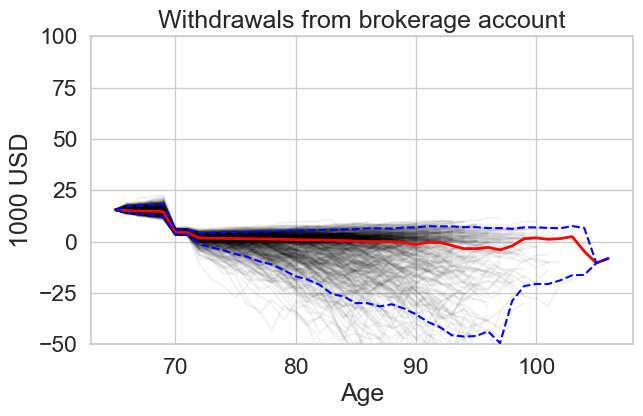

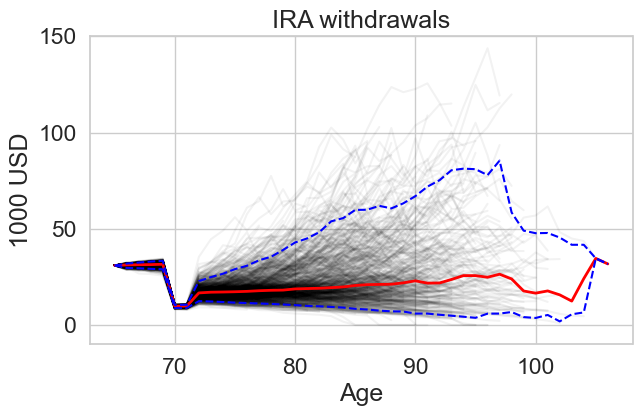

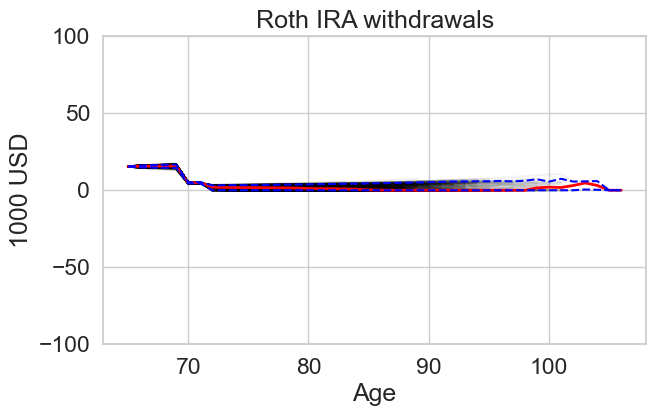

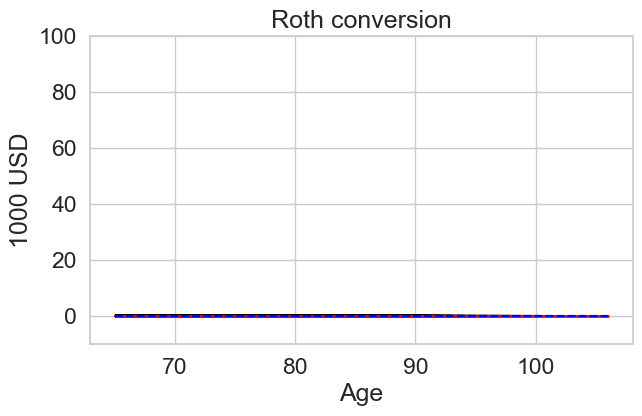

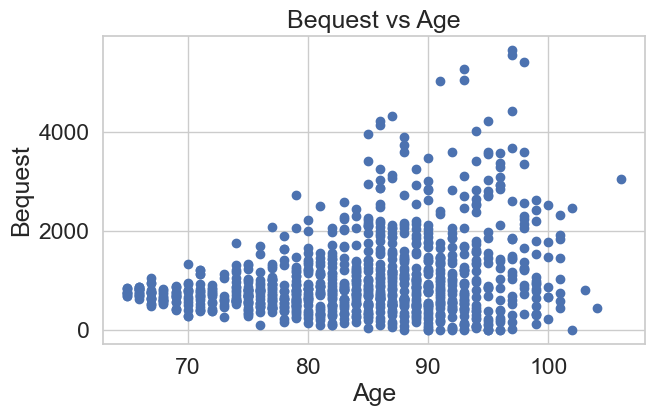

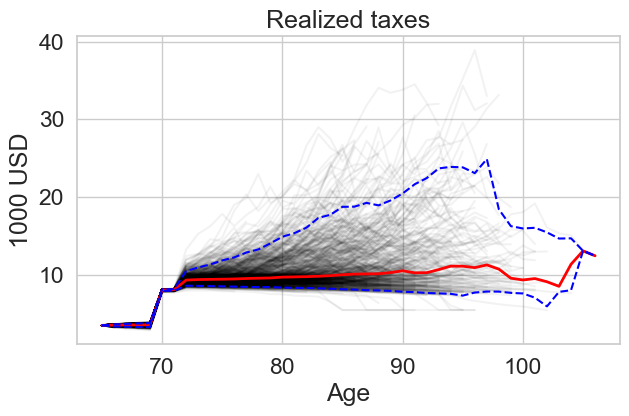

In [9]:
print('4%')
save='4p_upper'
results_4p.summarize(limits=limits, save=None, save_dir=False)

# Lower

In [ ]:
sex = 'M'

B_init = 50.
I_init = 100.
R_init = 0.

capital_tax_rate = 0.

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 2.013 * 12

c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters = Parameters(
    B_init=B_init,
    I_init=I_init,
    R_init=R_init,
    age_start=age_start,
    age_end=age_end,
    w_stocks_B=w_stocks_B,
    w_stocks_I=w_stocks_I,
    w_stocks_R=w_stocks_R,
    rho_B=rho_B,
    rho_I=rho_I,
    rho_R=rho_R,
    a=a,
    c0=c0,
    sex=sex,
    capital_tax_rate=capital_tax_rate,
)

results_MPC = simulate(parameters, n_sims=1_000, algo='MPC', seed=9)
results_4p = simulate(parameters, n_sims=1_000, algo='4_percent', seed=9)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.00    0.9
0.01    1.0
0.05    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.95    1.0
0.99    1.0
1.00    1.0
dtype: float64
0.00    0.57
0.01    0.70
0.05    0.82
0.25    0.97
0.50    1.06
0.75    1.18
0.95    1.47
0.99    1.76
1.00    3.22
dtype: float64


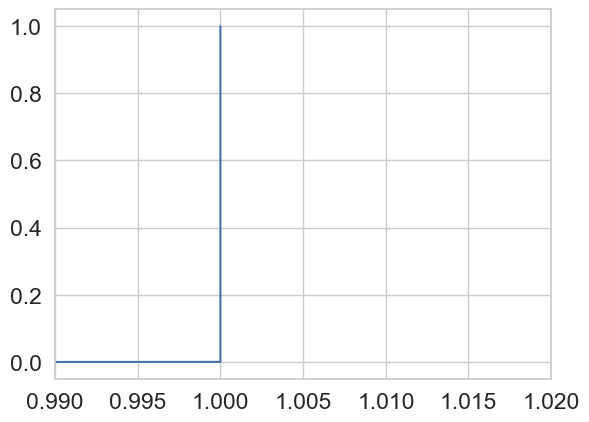

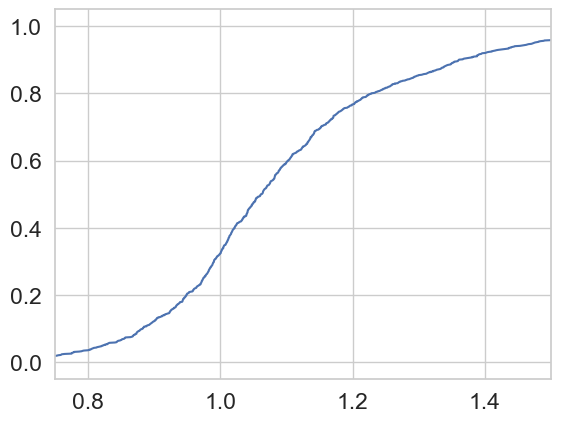

In [11]:
save=False

c_relative = pd.Series((results_MPC.c_matrix / results_4p.c_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((results_MPC.q / results_4p.q).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))


# OLD

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import summarize, summarize2, plot_ecdf, Parameters
from data import load_data
from backtest import simulate
from black_scholes import get_collar

sns.set_theme(font_scale=1.5, style='whitegrid')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Global variables

In [38]:
data = load_data()

deterministic = False

age_start = 65
age_end = 119
collar = False

w_stocks_B = 0.2
w_stocks_I = 0.6
w_stocks_R = 0.6

if collar:
    raise NotImplementedError("This is the no collar notebook")

else:
    rho_B = 1.033
    rho_I = 1.057
    rho_R = 1.057

    # rho_B = 1 + w_stocks_B * data.sp500.mean() + (1 - w_stocks_B) * data.treasury.mean() - data.inflation.mean()
    # rho_I = 1 + w_stocks_I * data.sp500.mean() + (1 - w_stocks_I) * data.treasury.mean() - data.inflation.mean()
    # rho_R = 1 + w_stocks_R * data.sp500.mean() + (1 - w_stocks_R) * data.treasury.mean() - data.inflation.mean()

d_max = 8

s1=2.5
s2=0.75

In [4]:
data.inflation.median()

np.float64(0.028999999999999998)

# Upper middle class

In [39]:
sex = 'F' 

B_init = 200.; shares = 1.; basis = B_init / 2; price = B_init
I_init = 400.
R_init = 200.

capital_tax_rate = 0.15

gamma = 500.

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 3.938 * 12
l = pd.Series(np.zeros(120), index=range(120))
c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375

parameters2 = Parameters(B_init=B_init,
                        I_init=I_init,
                        R_init=R_init,
                        basis=basis,
                        price=price,
                        shares=shares,
                        age_start=age_start,
                        age_end=age_end,
                        sex=sex,
                        collar=collar,
                        rho_B=rho_B,
                        rho_I=rho_I,
                        rho_R=rho_R,
                        e=e,
                        a=a,
                        l=l,
                        d_max=d_max,
                        c0=c0,
                        gamma=gamma,
                        w_stocks_B=w_stocks_B,
                        w_stocks_I=w_stocks_I,
                        w_stocks_R=w_stocks_R,
                        k=data.inflation.median(),
                        s1=s1,
                        s2=s2,
                        deterministic=deterministic,
                        capital_tax_rate=capital_tax_rate)

# simulation_MPC = simulate(data, parameters, n_runs=1000, algo='MPC', seed=9);
# simulation_4p = simulate(data, parameters, n_runs=1000, algo='4_percent', seed=9);

In [58]:
parameters.a, parameters2.a

(0       0.000
 1       0.000
 2       0.000
 3       0.000
 4       0.000
         ...  
 115    24.156
 116    24.156
 117    24.156
 118    24.156
 119    24.156
 Length: 120, dtype: float64,
 0       0.000
 1       0.000
 2       0.000
 3       0.000
 4       0.000
         ...  
 115    47.256
 116    47.256
 117    47.256
 118    47.256
 119    47.256
 Length: 120, dtype: float64)

65

In [35]:
results_4p.ages

0      91
1      74
2      84
3      88
4      72
       ..
995    89
996    95
997    71
998    66
999    94
Length: 1000, dtype: int64

In [36]:
simulation_4p2.ages

0       87
1       81
2       93
3       85
4       87
      ... 
995     80
996    101
997     66
998     77
999     97
Length: 1000, dtype: int64

In [28]:
simulation_4p2.bequests.sort_values()

733    6.582396e-07
707    6.727046e-07
287    6.789764e-07
460    6.963002e-07
842    7.114381e-07
           ...     
546    5.045965e+03
413    5.275787e+03
523    5.411538e+03
498    5.555965e+03
408    5.644159e+03
Length: 1000, dtype: float64

0.00    0.78
0.01    0.95
0.05    1.00
0.25    1.00
0.50    1.00
0.75    1.00
0.95    1.00
0.99    1.00
1.00    1.25
dtype: float64
0.00           0.42
0.01           0.58
0.05           0.84
0.25           0.98
0.50           1.06
0.75           1.16
0.95           1.33
0.99            4.2
1.00    74773728.03
dtype: object


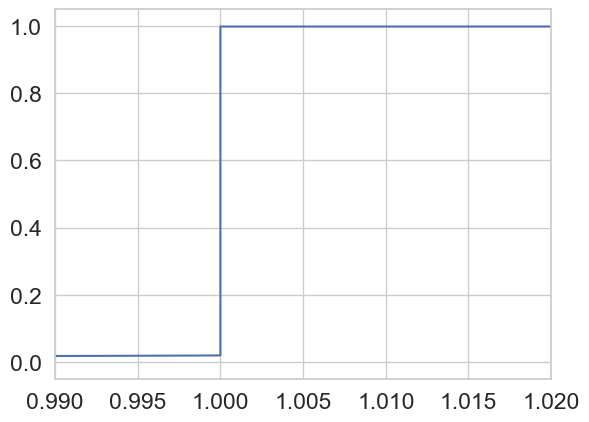

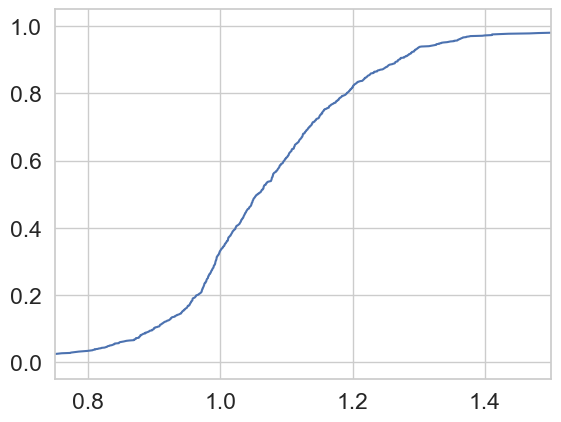

In [14]:
save=False

c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2).astype(str))



0.00    0.78
0.01    0.95
0.05    1.00
0.25    1.00
0.50    1.00
0.75    1.00
0.95    1.00
0.99    1.00
1.00    1.25
dtype: float64
0.00           0.42
0.01           0.58
0.05           0.84
0.25           0.98
0.50           1.06
0.75           1.16
0.95           1.33
0.99           4.21
1.00    74838790.14
dtype: object


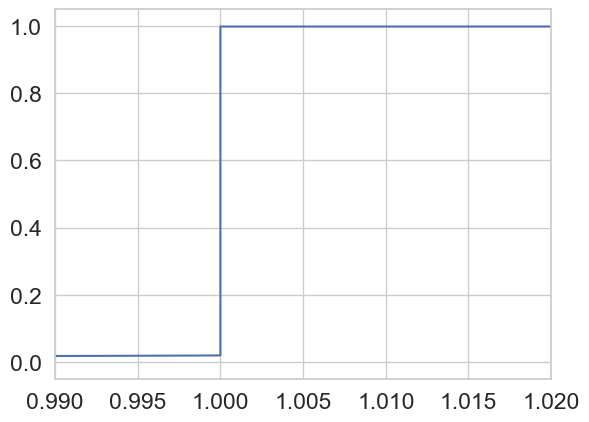

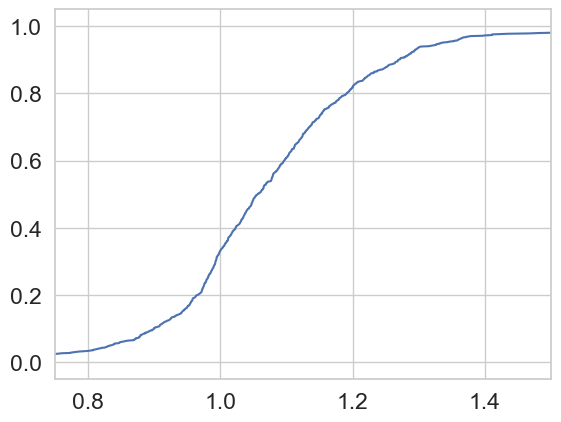

In [7]:
save=False

c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2).astype(str))



0.00    0.78
0.01    0.95
0.05    1.00
0.25    1.00
0.50    1.00
0.75    1.00
0.95    1.00
0.99    1.00
1.00    1.25
dtype: float64
0.00           0.42
0.01           0.58
0.05           0.84
0.25           0.98
0.50           1.06
0.75           1.16
0.95           1.33
0.99           4.19
1.00    74773707.69
dtype: object


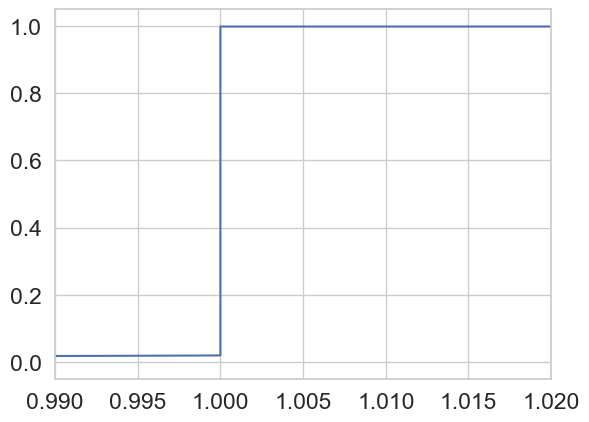

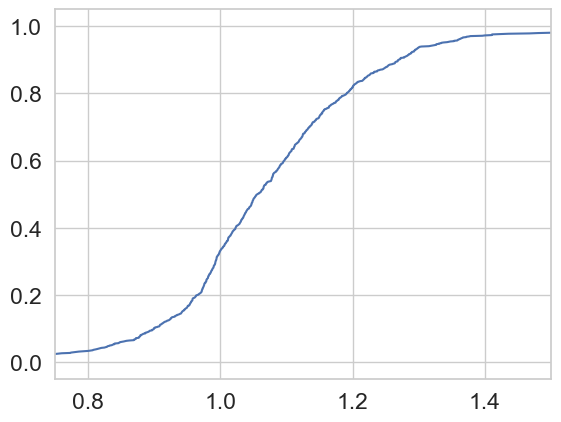

In [4]:
save=False

c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.75, 1.5)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2).astype(str))



In [15]:
(c_relative.round(2) < 1).mean()

np.float64(0.03675427005334508)

In [5]:
(q_relative>1).mean(), q_relative[q_relative>1].median()

(np.float64(0.668), np.float64(1.122030292921008))

In [11]:
def consumption(simulation):

    c = np.isclose(simulation.cash_matrix.dropna(), parameters.c0, atol=1e-6)
    assert c.all()

def cash_balance(simulation):

    lhs = pd.DataFrame(simulation.b_matrix.values + simulation.i_matrix.values + simulation.r_matrix.values + parameters.e.loc[age_start:age_end].values[:, None] + parameters.a.loc[age_start:age_end].values[:, None])
    rhs = pd.DataFrame(simulation.cash_matrix.values + simulation.liabilities_matrix.values + simulation.tau_matrix.values)

    diff =  (lhs - rhs)
    assert np.isclose(diff.replace(np.nan, 0), 0, atol=1e-3).all()

def account_balance(simulation):
    assert (simulation.B_matrix.dropna() >=0).all().all()
    assert (simulation.I_matrix.dropna() >=0).all().all()
    assert (simulation.R_matrix.dropna() >=0).all().all()

    return simulation.B_matrix.dropna() >=0, simulation.I_matrix.dropna() >=0, simulation.R_matrix.dropna() >=0


def dynamics(simulation):

    dynamics_B = pd.DataFrame(simulation.B_matrix.shift(-1).values - (simulation.B_matrix.values - simulation.b_matrix.values) * parameters.rho_B).dropna()
    dynamics_I = pd.DataFrame(simulation.I_matrix.shift(-1).values - (simulation.I_matrix.values - simulation.i_matrix.values) * parameters.rho_I).dropna()
    dynamics_R = pd.DataFrame(simulation.R_matrix.shift(-1).values - (simulation.R_matrix.values - simulation.r_matrix.values) * parameters.rho_R).dropna()

    assert np.isclose(dynamics_B, 0).all().all()
    assert np.isclose(dynamics_I, 0).all().all()
    assert np.isclose(dynamics_R, 0).all().all()
    return dynamics_B, dynamics_I, dynamics_R

def withdrawals(simulation):

    withdrawals_i = pd.DataFrame(simulation.i_matrix.values - (simulation.i_c_matrix.values - simulation.i_d_matrix.values + simulation.i_w_matrix.values)).dropna()
    withdrawals_r = pd.DataFrame(simulation.r_matrix.values - (-simulation.r_c_matrix.values - simulation.r_d_matrix.values + simulation.r_w_matrix.values)).dropna()
    conversions = pd.DataFrame(simulation.i_c_matrix.values - simulation.r_c_matrix.values).dropna()

    assert np.isclose(withdrawals_i, 0, atol=1e-6).all().all()
    assert np.isclose(withdrawals_r, 0, atol=1e-6).all().all()
    assert np.isclose(conversions, 0, atol=1e-6).all().all()

    return withdrawals_i, withdrawals_r, conversions

def limits(simulation):

    limits_B = pd.DataFrame(simulation.b_matrix.dropna().values <= simulation.B_matrix.dropna().values).dropna()  
    limits_I = pd.DataFrame(simulation.i_matrix.dropna().values <= simulation.I_matrix.dropna().values).dropna()
    limits_R = pd.DataFrame(simulation.r_matrix.dropna().values <= simulation.R_matrix.dropna().values).dropna()

    assert limits_B.values.all().all()
    assert limits_I.values.all().all()
    assert limits_R.values.all().all()

    return limits_B, limits_I, limits_R

def RMD(simulation):

    rmd = pd.DataFrame(simulation.i_w_matrix.dropna().values >= data.kappa.loc[simulation.i_w_matrix.dropna().index].values[:, None] * simulation.i_matrix.loc[simulation.i_w_matrix.dropna().index].values)
    assert rmd.values.all()
    return rmd

def bequest(simulation):

    return pd.DataFrame(simulation.B_matrix.dropna().values[-1] + simulation.I_matrix.dropna().values[-1] + simulation.R_matrix.dropna().values[-1])

In [12]:
c_MPC = consumption(simulation_MPC)
c_4p = consumption(simulation_4p)

cash_balance_MPC = cash_balance(simulation_MPC)
cash_balance_4p = cash_balance(simulation_4p)

account_balance_B_MPC, account_balance_I_MPC, account_balance_R_MPC = account_balance(simulation_MPC)
account_balance_B_4p, account_balance_I_4p, account_balance_R_4p = account_balance(simulation_4p)

dynamics_B_MPC, dynamics_I_MPC, dynamics_R_MPC = dynamics(simulation_MPC)
dynamics_B_4p, dynamics_I_4p, dynamics_R_4p = dynamics(simulation_4p)

withdrawals_i_MPC, withdrawals_r_MPC, conversions_MPC = withdrawals(simulation_MPC)
withdrawals_i_4p, withdrawals_r_4p, conversions_4p = withdrawals(simulation_4p)

limits_B_MPC, limits_I_MPC, limits_R_MPC = limits(simulation_MPC)
limits_B_4p, limits_I_4p, limits_R_4p = limits(simulation_4p)

RMD_MPC = RMD(simulation_MPC)
RMD_4p = RMD(simulation_4p)

bequest_MPC = bequest(simulation_MPC)
bequest_4p = bequest(simulation_4p)

In [13]:
quantiles_c_MPC = pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna().quantile([0.05, 0.5, 0.95])
quantiles_c_4p = pd.Series(simulation_4p.cash_matrix.values.flatten()).dropna().quantile([0.05, 0.5, 0.95])

quantiles_q_MPC = simulation_MPC.bequests.quantile([0.05, 0.5, 0.95])
quantiles_q_4p = simulation_4p.bequests.quantile([0.05, 0.5, 0.95])

print('Consumption')
print('MPC', quantiles_c_MPC.astype(int))
print('Benchmark', quantiles_c_4p.astype(int))

print('\nBequests')
print('MPC', quantiles_q_MPC.astype(int))
print('Benchmark', quantiles_q_4p.astype(int))

Consumption
MPC 0.05    58
0.50    58
0.95    58
dtype: int64
Benchmark 0.05    58
0.50    58
0.95    58
dtype: int64

Bequests
MPC 0.05     129
0.50     830
0.95    3447
dtype: int64
Benchmark 0.05     173
0.50     805
0.95    2722
dtype: int64


In [5]:
ret_adj_B = pd.Series(simulation_MPC.ret_adj_matrix_B.values.flatten()).dropna()
ret_adj_I = pd.Series(simulation_MPC.ret_adj_matrix_I.values.flatten()).dropna()
ret_adj_R = pd.Series(simulation_MPC.ret_adj_matrix_R.values.flatten()).dropna()
ret_adj_B.to_csv('cache/ret_adj_B.csv')
ret_adj_I.to_csv('cache/ret_adj_I.csv')
ret_adj_R.to_csv('cache/ret_adj_R.csv')

<Axes: >

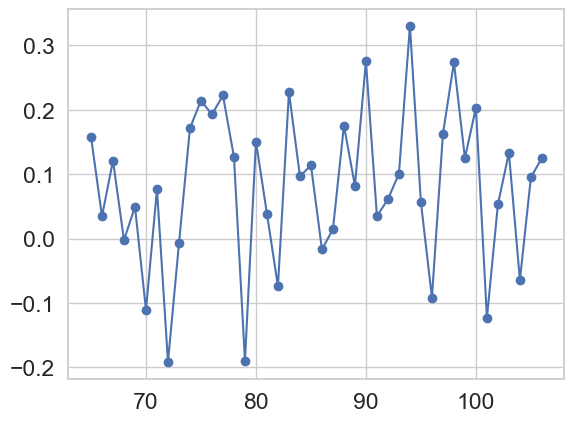

In [42]:
simulation_MPC.ret_adj_matrix_R.iloc[:, 307].dropna().plot(marker='o')

<Axes: >

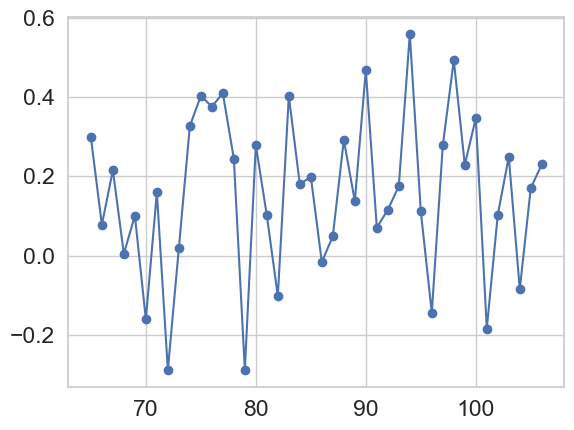

In [43]:
simulation_MPC.return_matrix_R.iloc[:, 307].dropna().plot(marker='o')

<Axes: >

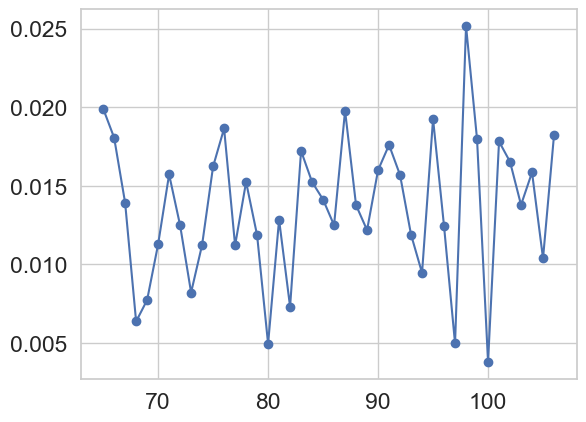

In [39]:
simulation_MPC.inflation_matrix.iloc[:, 307].plot(marker='o')

In [17]:
ret_adj_B.mean().mean(), ret_adj_I.mean().mean(), ret_adj_R.mean().mean()

(np.float64(0.033622732846011937),
 np.float64(0.05758354605677479),
 np.float64(0.05758354605677479))

In [6]:
matrix = pd.DataFrame(simulation_4p.B_matrix.values + simulation_4p.I_matrix.values + simulation_4p.R_matrix.values)
print(f'Benchmark broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

matrix = pd.DataFrame(simulation_MPC.B_matrix.values + simulation_MPC.I_matrix.values + simulation_MPC.R_matrix.values)
print(f'MPC broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

Benchmark broke 0.60% of the time
MPC broke 0.00% of the time


In [27]:
matrix.ffill().iloc[-1]

0      1391.256158
1      1235.514661
2       384.905743
3      1082.921054
4       899.635260
          ...     
995    1076.116895
996     475.663811
997     768.895774
998     926.429464
999     472.396476
Name: 54, Length: 1000, dtype: float64

In [35]:
limits = Limits(
    B_min=-10,
    B_max=2000,
    I_min=-10,
    I_max=2000,
    R_min=-10,
    R_max=5000,
    b_min=-50,
    b_max=100,
    i_min=-10,
    i_max=150,
    r_min=-100,
    r_max=100,
    r_c_min=-10,
    r_c_max=100,
)

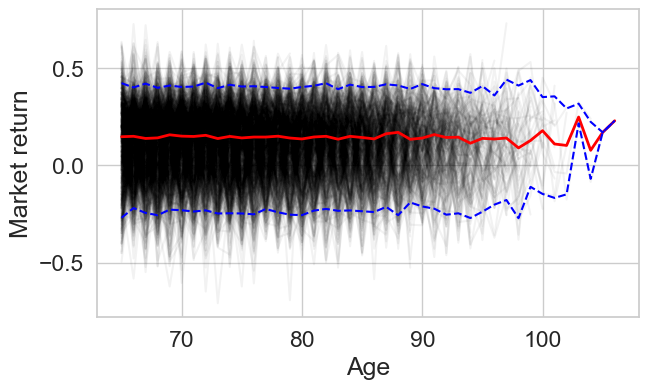

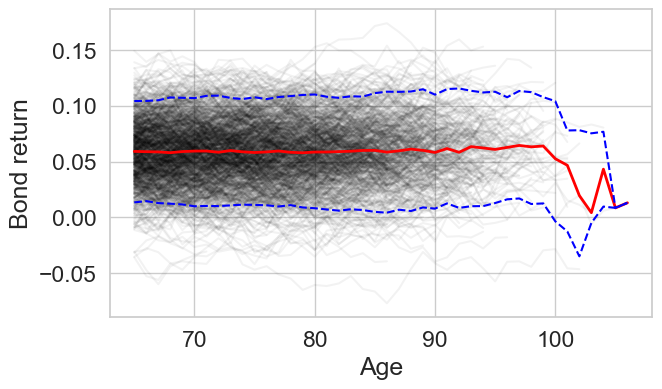

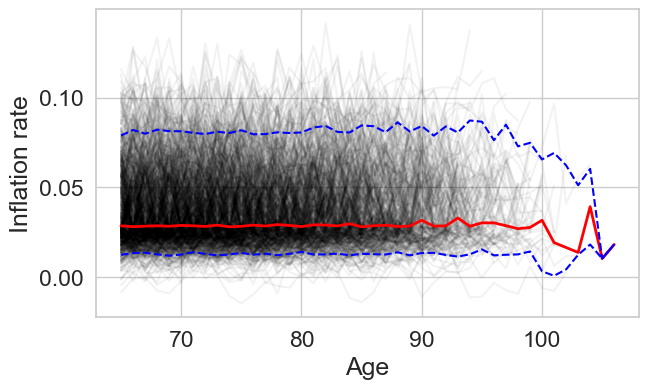

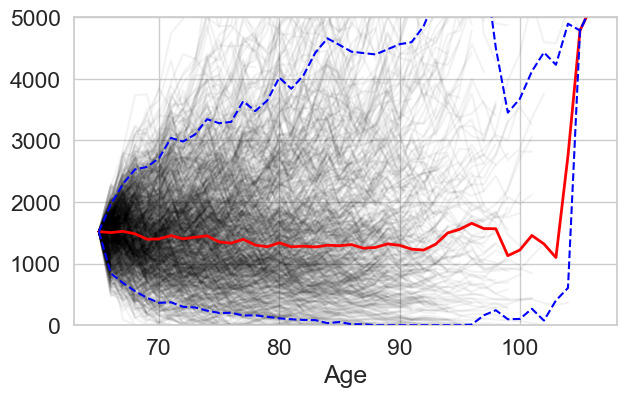

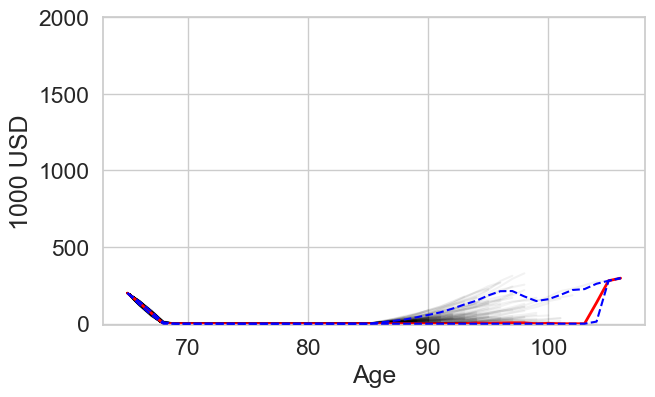

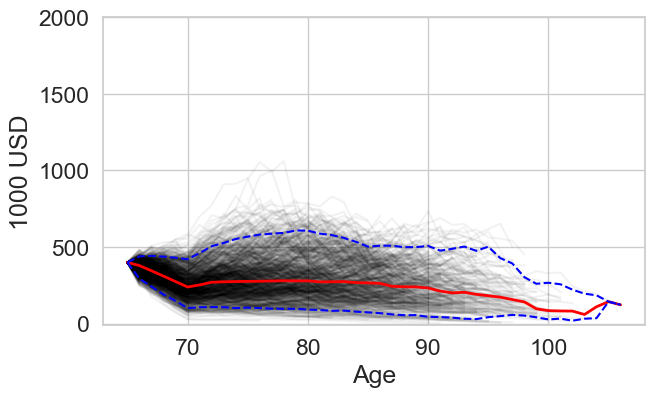

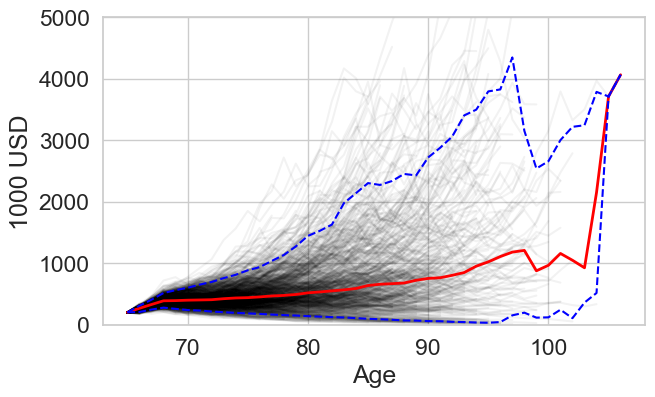

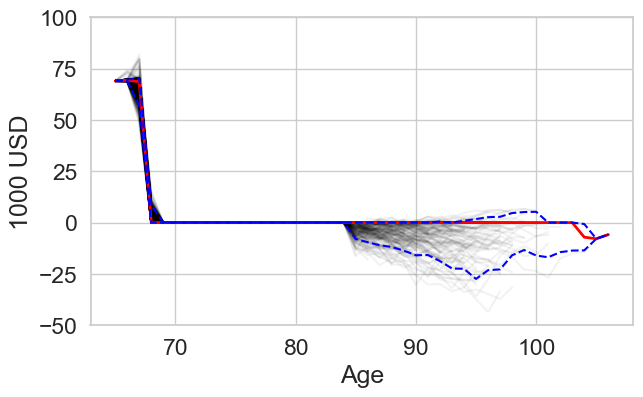

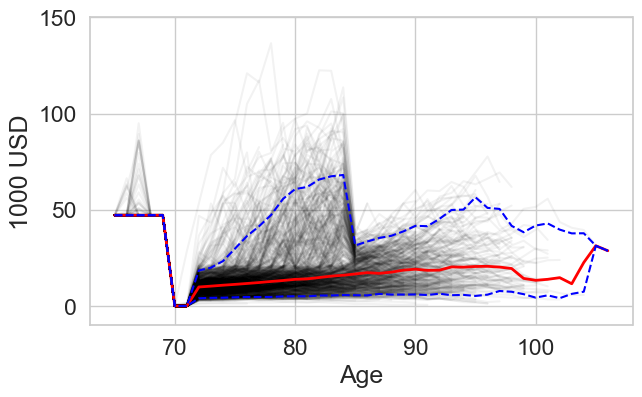

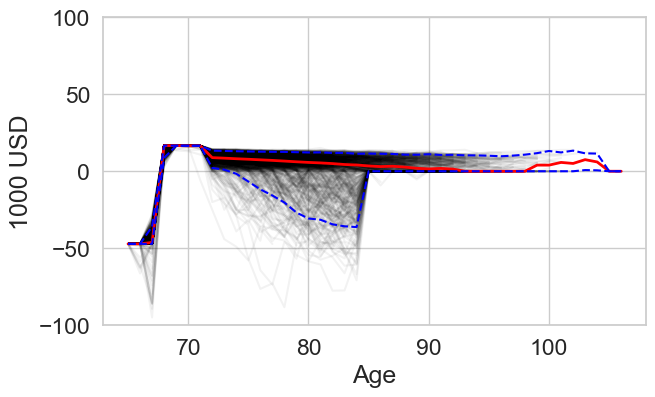

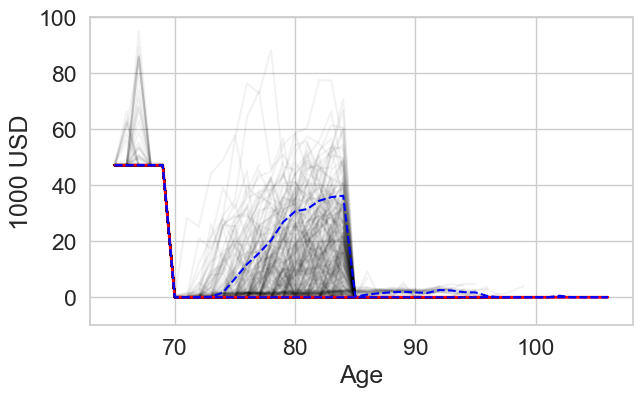

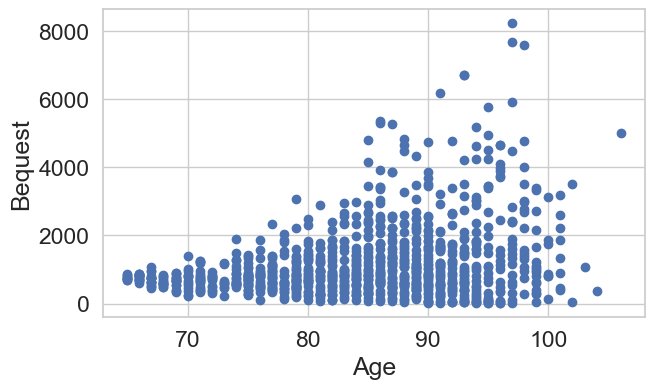

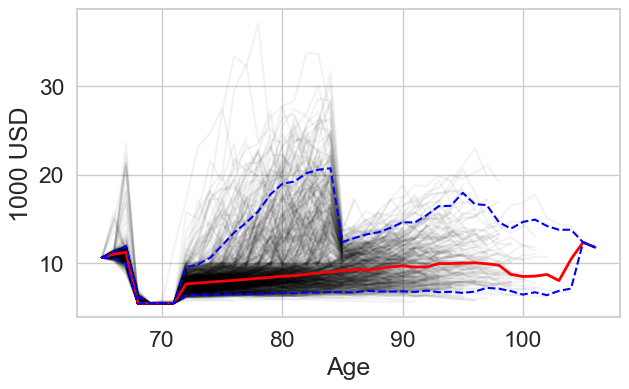

In [38]:
summarize(simulation_MPC, save='MPC_upper', target=c0, verbose=False, y_min=40, y_max=75, bequest_max=5000, limits=limits)

In [129]:
60 * 0.05

3.0

In [126]:
a = ['daas', ' sa']

for x in a:
    print(x)
    x = x.replace('a', '')
    print(x)
a


daas
ds
 sa
 s


['daas', ' sa']

In [127]:
10 == 10 == 10

True

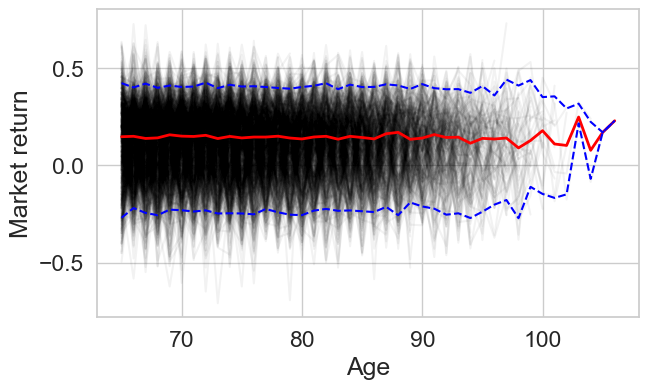

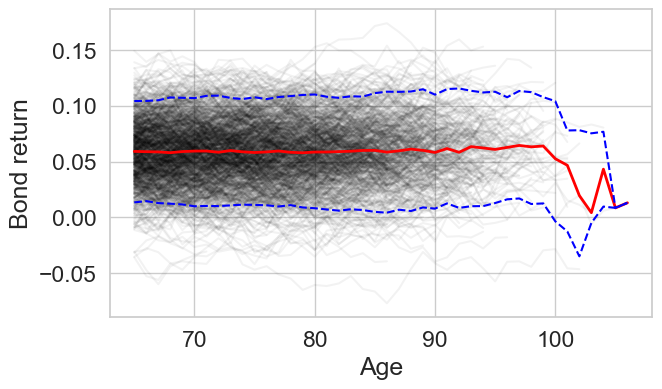

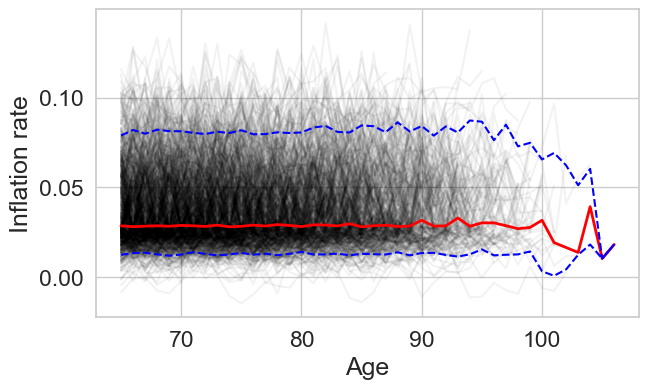

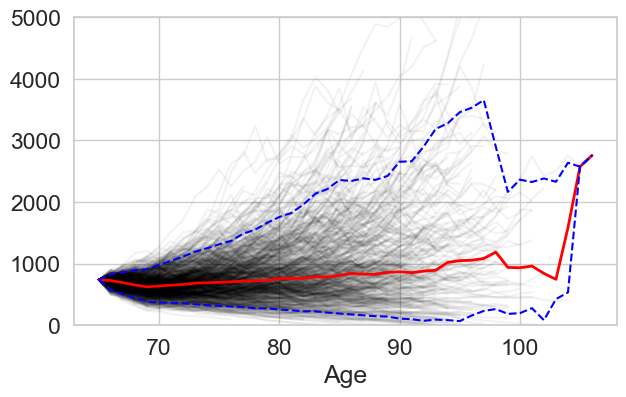

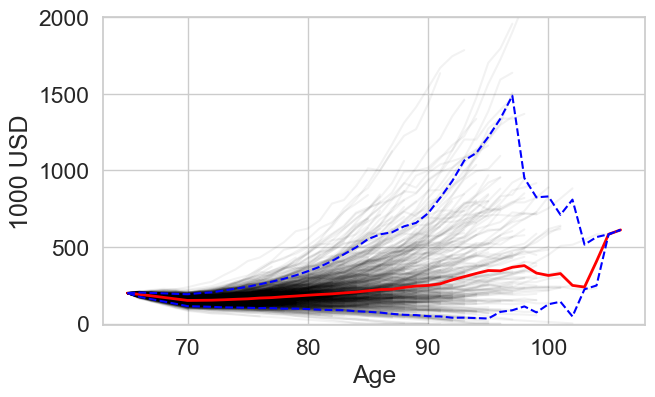

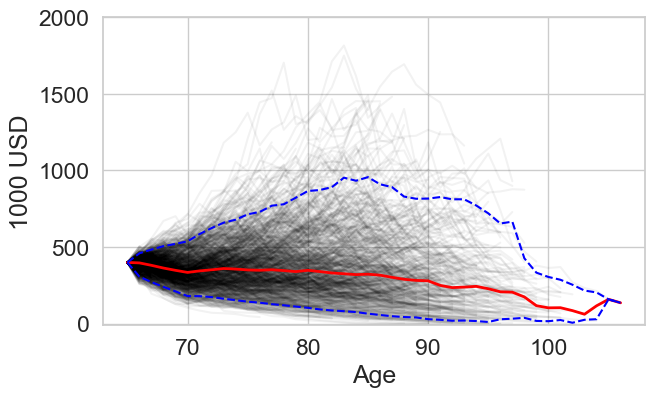

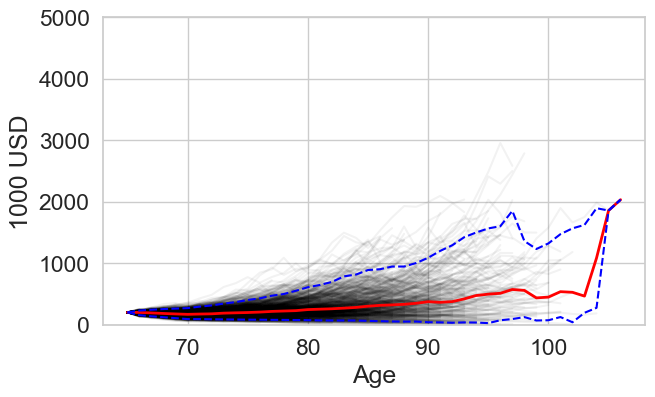

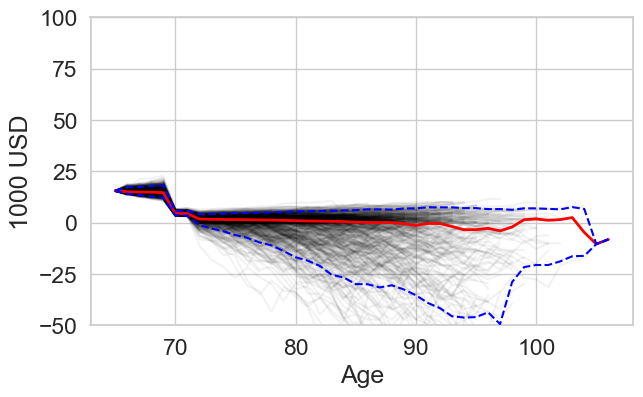

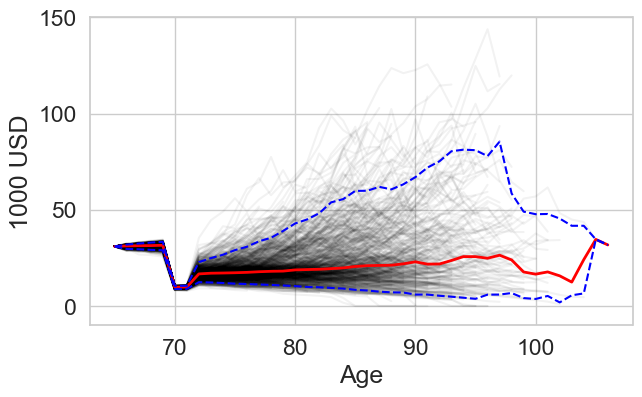

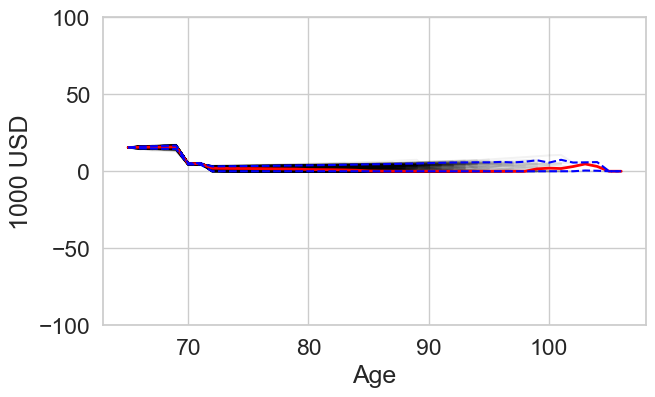

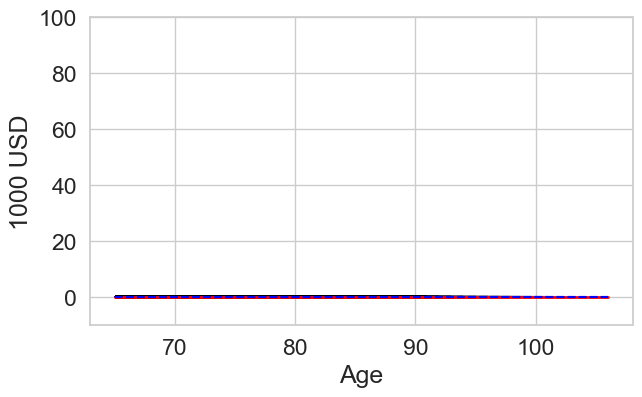

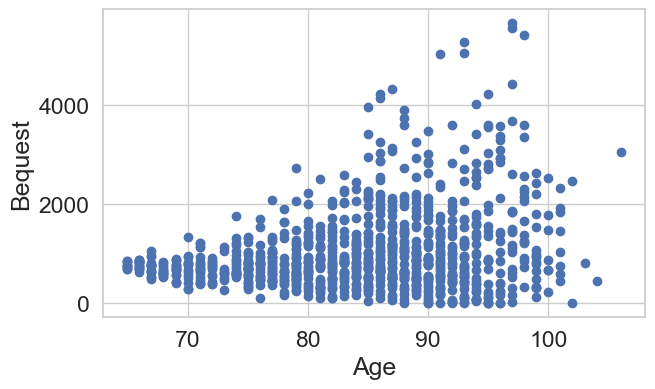

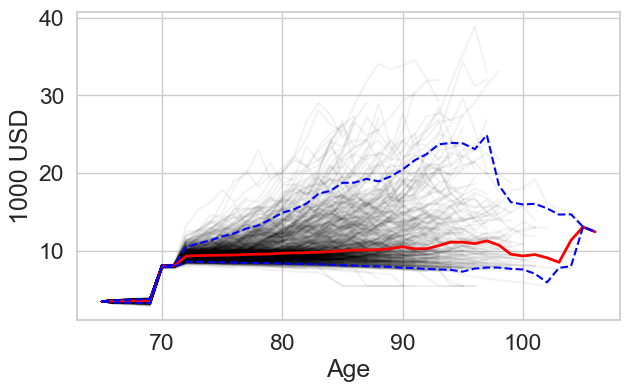

In [39]:
summarize(simulation_4p, save='4p_upper', target=c0, verbose=False, y_min=40, y_max=75, bequest_max=5000, limits=limits)

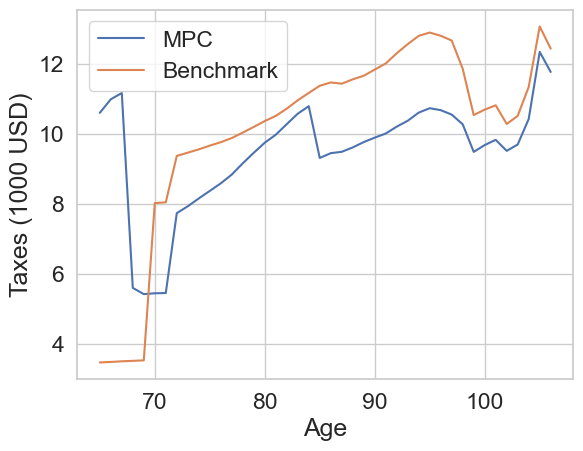

In [7]:
save = False
simulation_MPC.tau_realized_matrix.mean(axis=1).plot(label='MPC')
simulation_4p.tau_realized_matrix.mean(axis=1).plot(label='Benchmark')
# simulation_MPC_collar.tau_realized_matrix.mean(axis=1).plot(label='MPC with collar')
plt.ylabel('Taxes (1000 USD)')
plt.xlabel('Age')
plt.legend();
plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/taxes_{save}.png', bbox_inches='tight')

In [8]:
simulation_MPC.bequests.to_csv('cache/MPC_upper_bequests.csv')
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna().to_csv('cache/MPC_upper_cash.csv')

In [32]:
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna()

0        58.3536
1        58.3536
2        58.3536
3        58.3536
4        58.3536
          ...   
38899    58.3536
39307    58.3536
39899    58.3536
40307    58.3536
41307    58.3536
Length: 20433, dtype: float64

# Lower middle class

In [9]:
sex = 'M' 

B_init = 50.; shares = 1.; basis = B_init / 2; price = B_init
I_init = 100.
R_init = 0.

capital_tax_rate = 0.

gamma = 500.

e = pd.Series(np.zeros(120), index=range(120))
a = pd.Series(np.zeros(120), index=range(120))
a[70:] = 2.013 * 12
l = pd.Series(np.zeros(120), index=range(120))
c0 = (B_init + I_init + R_init + a.loc[age_start:85].sum() + e[age_start:85].sum()) * 0.0375 

parameters = Parameters(B_init=B_init,
                        I_init=I_init,
                        R_init=R_init,
                        basis=basis,
                        price=price,
                        shares=shares,
                        age_start=age_start,
                        age_end=age_end,
                        sex=sex,
                        collar=collar,
                        rho_B=rho_B,
                        rho_I=rho_I,
                        rho_R=rho_R,
                        e=e,
                        a=a,
                        l=l,
                        d_max=d_max,
                        c0=c0,
                        gamma=gamma,
                        w_stocks_B=w_stocks_B,
                        w_stocks_I=w_stocks_I,
                        w_stocks_R=w_stocks_R,
                        k=data.inflation.median(),
                        s1=s1,
                        s2=s2,
                        deterministic=deterministic,
                        capital_tax_rate=capital_tax_rate)

simulation_MPC = simulate(data, parameters, n_runs=1000, algo='MPC', seed=9)
simulation_4p = simulate(data, parameters, n_runs=1000, algo='4_percent', seed=9)

100%|██████████| 1000/1000 [00:09<00:00, 108.55it/s]


0.00    0.7
0.01    1.0
0.05    1.0
0.50    1.0
0.95    1.0
0.99    1.0
1.00    1.0
dtype: float64
0.00    0.15
0.01    0.59
0.05    0.73
0.50    1.08
0.95    1.71
0.99    2.15
1.00    5.12
dtype: float64


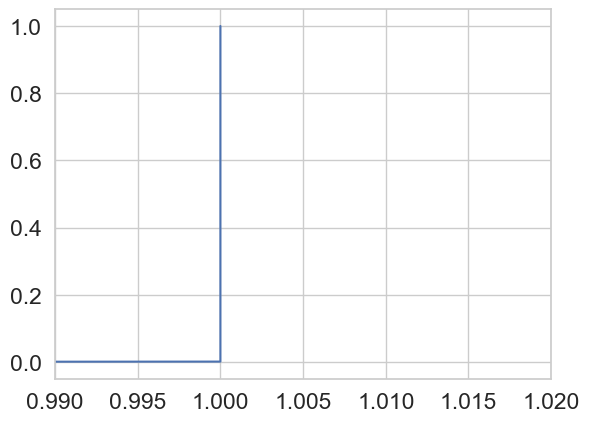

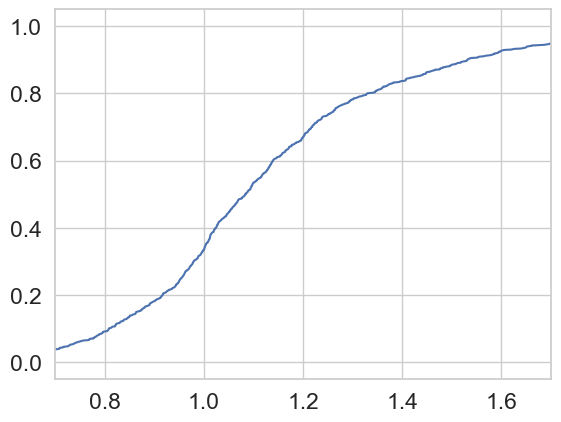

In [32]:
save = False
c_relative = pd.Series((simulation_MPC.cash_matrix / simulation_4p.cash_matrix).values.flatten()).dropna()
plot_ecdf(c_relative)
plt.xlim(0.99, 1.02)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/c_relative_{save}.png', bbox_inches='tight')

plt.figure()
q_relative = pd.Series((simulation_MPC.bequests / simulation_4p.bequests).values.flatten()).dropna()
plot_ecdf(q_relative)
plt.xlim(0.7, 1.7)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/q_relative_{save}.png', bbox_inches='tight')

print(c_relative.quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))
print(q_relative.quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))

In [21]:
c_relative

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
38180    1.0
38307    1.0
39307    1.0
40307    1.0
41307    1.0
Length: 17537, dtype: float64

In [16]:
(c_relative.round(2) != 1 ).mean() * 100

np.float64(0.011404459143525118)

In [11]:
(q_relative>1).mean(), q_relative[q_relative>1].median()

(np.float64(0.676), np.float64(1.1350318320410946))

In [33]:
matrix = pd.DataFrame(simulation_4p.B_matrix.values + simulation_4p.I_matrix.values + simulation_4p.R_matrix.values)
print(f'Benchmark broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

matrix = pd.DataFrame(simulation_MPC.B_matrix.values + simulation_MPC.I_matrix.values + simulation_MPC.R_matrix.values)
print(f'MPC broke {(matrix.ffill().iloc[-1] < 1).mean():.2%} of the time')

Benchmark broke 0.00% of the time
MPC broke 0.10% of the time


In [99]:
limits = Limits(
    B_min = -10,
    B_max = 500,
    I_min = -10,
    I_max = 200,
    R_min = -10,
    R_max = 1000,
    b_min = -20,
    b_max = 30,
    i_min = -5,
    i_max = 40,
    r_min = -50,
    r_max = 40,
    r_c_min = -5,
    r_c_max = 40,
    )

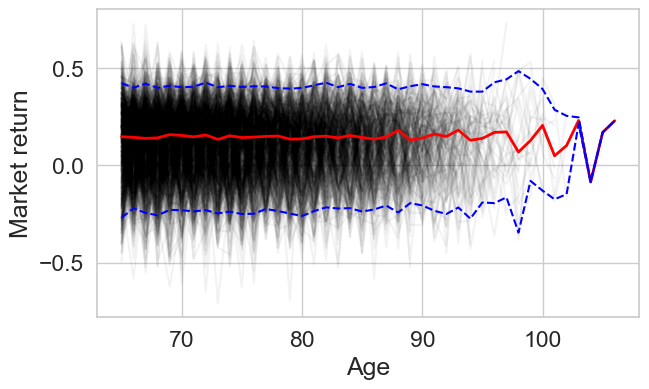

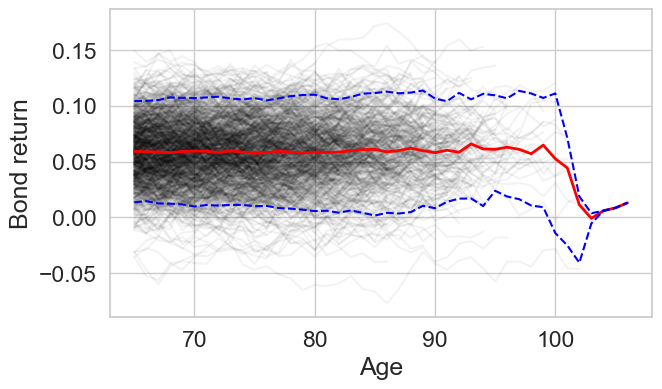

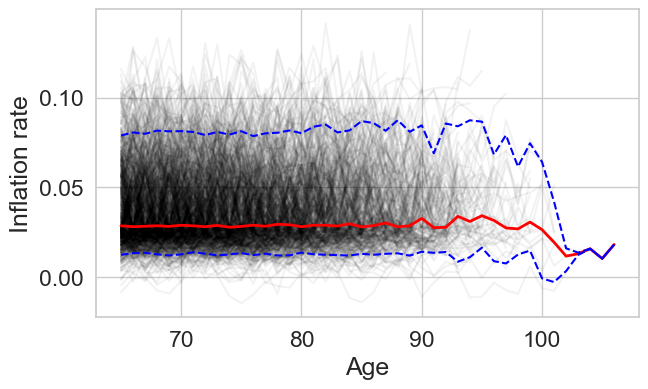

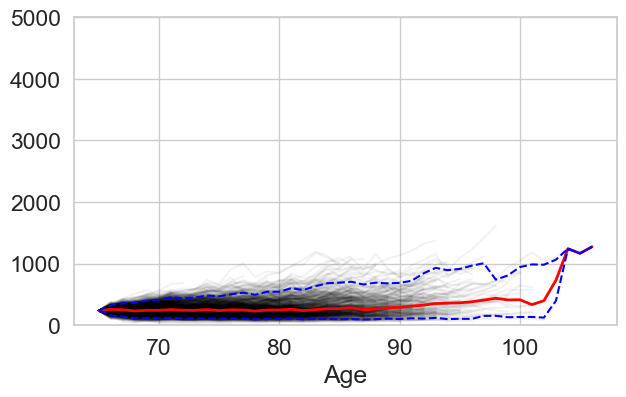

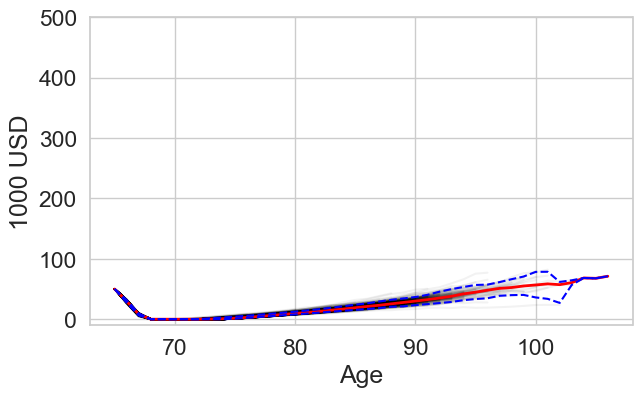

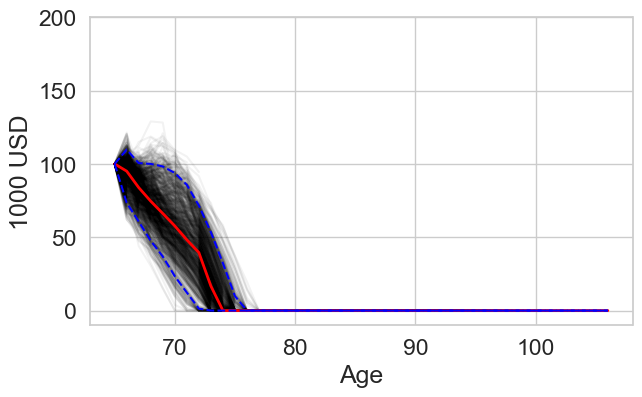

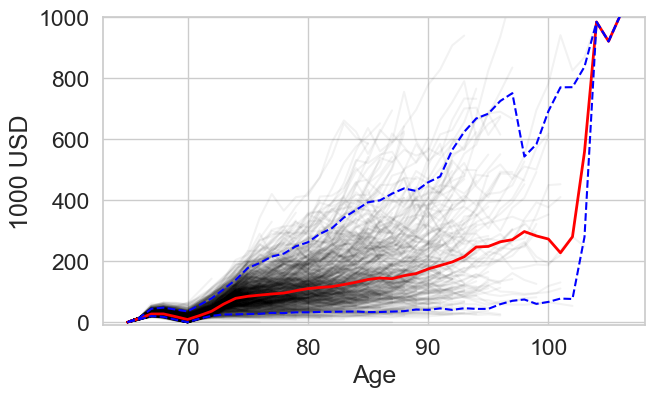

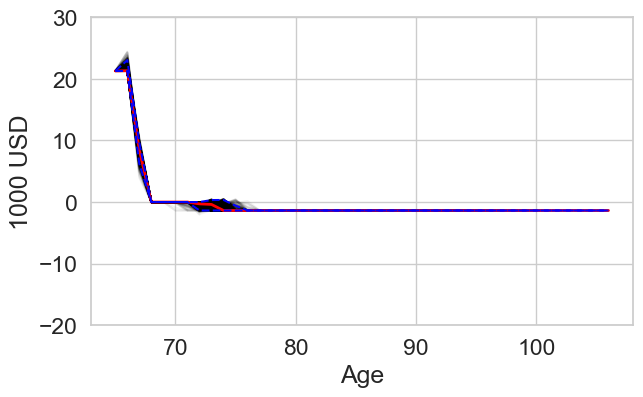

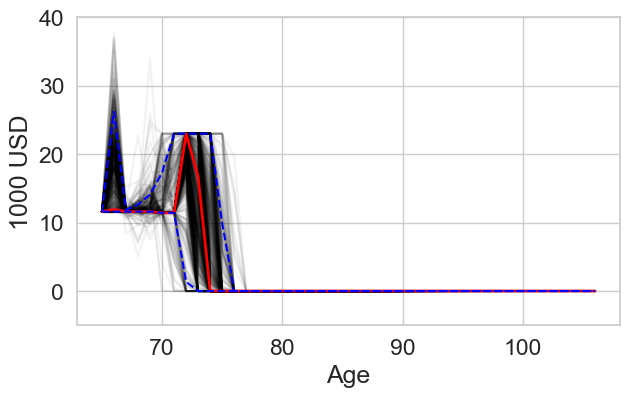

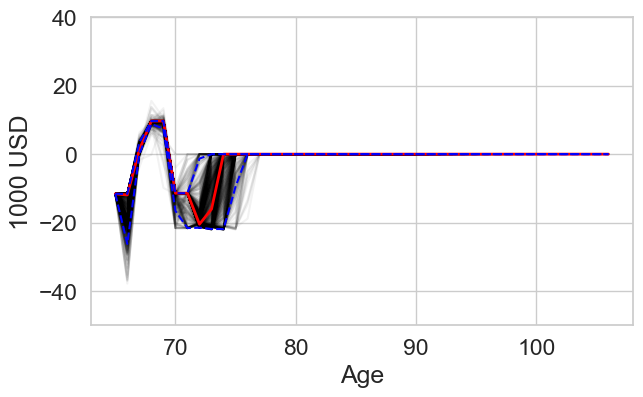

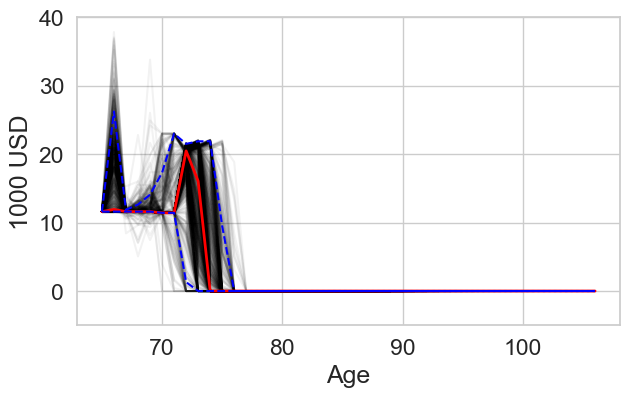

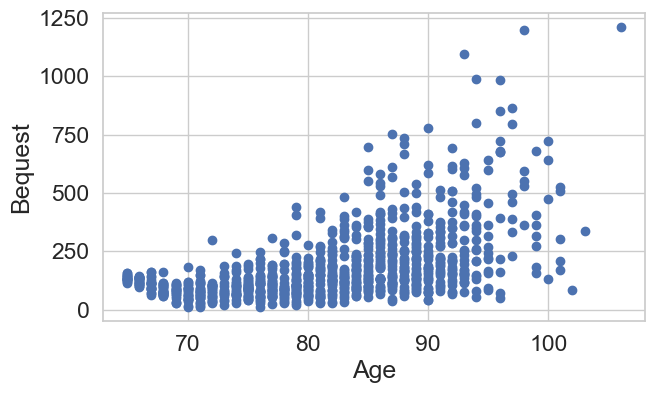

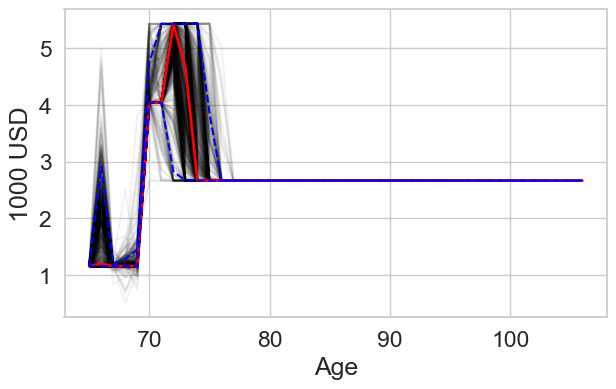

In [100]:
summarize(simulation_MPC, save='MPC_lower', target=c0, verbose=False, y_min=19, y_max=21, limits=limits)

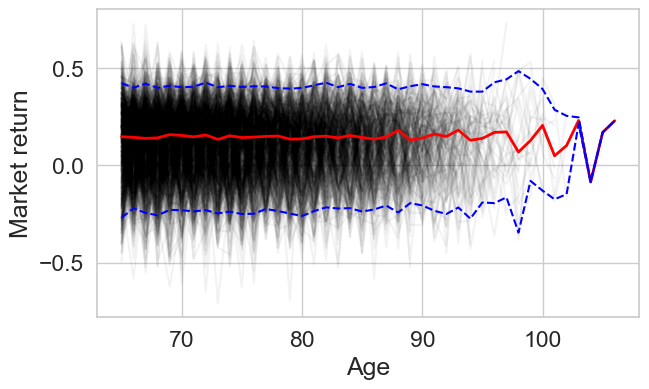

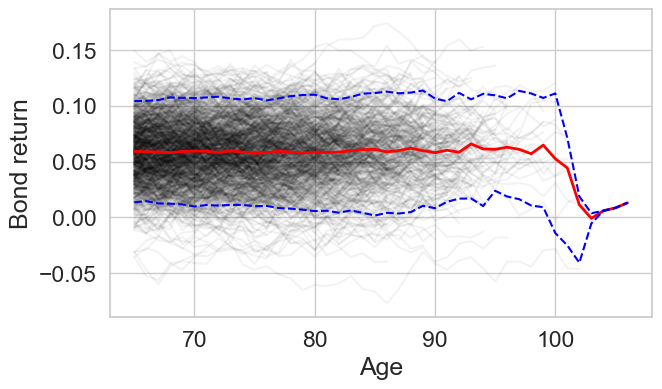

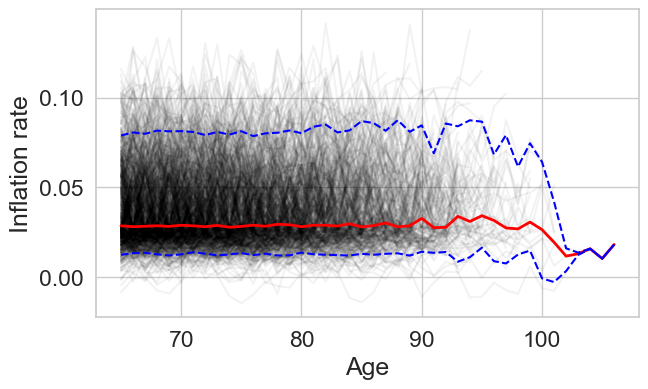

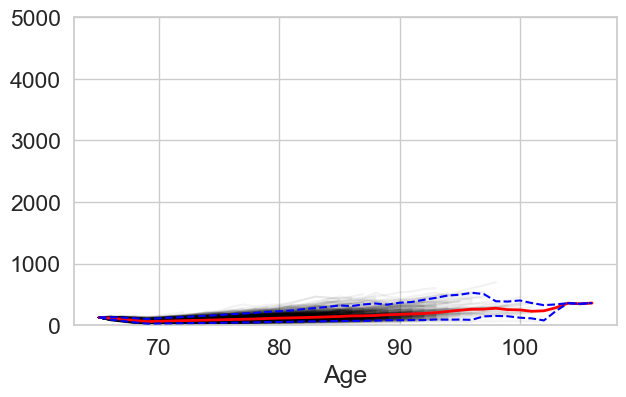

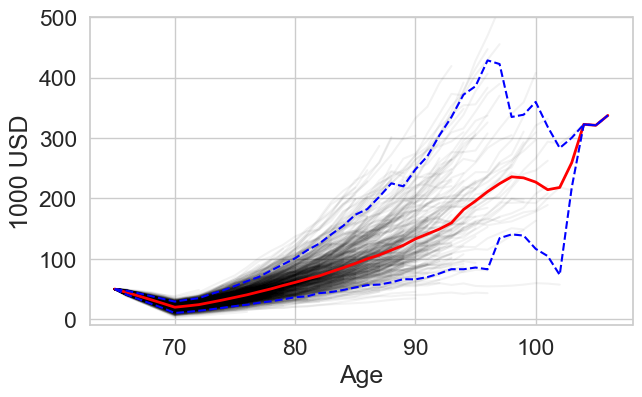

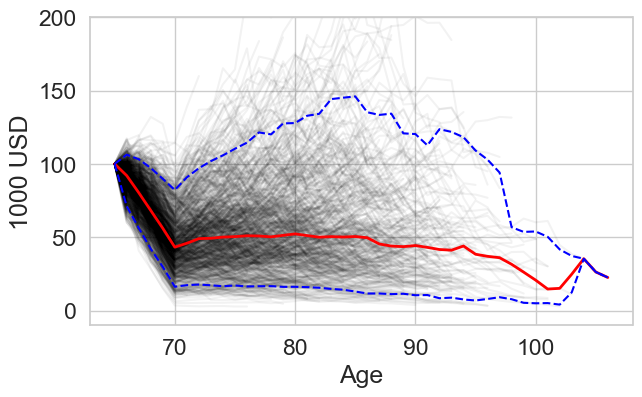

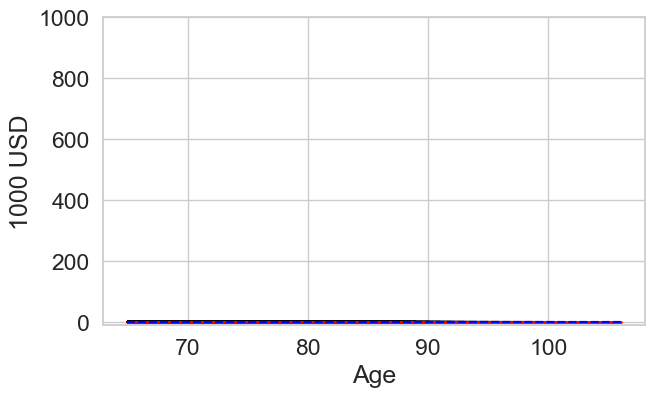

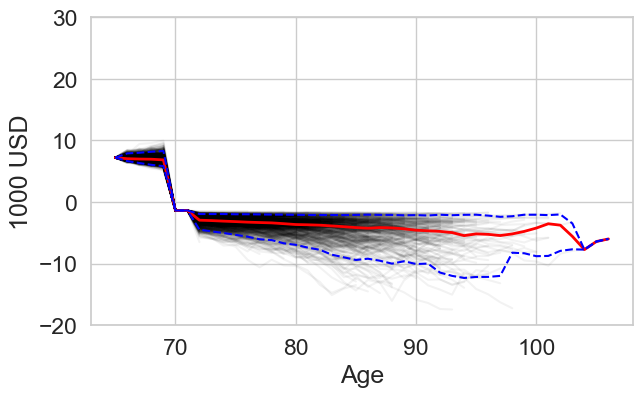

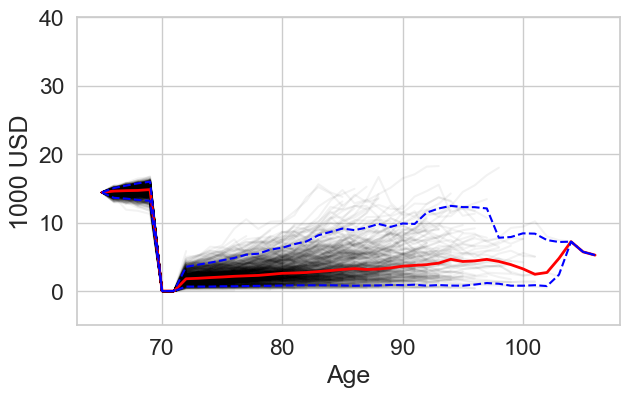

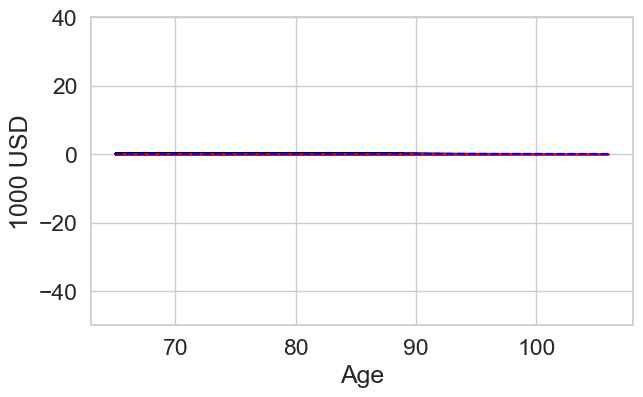

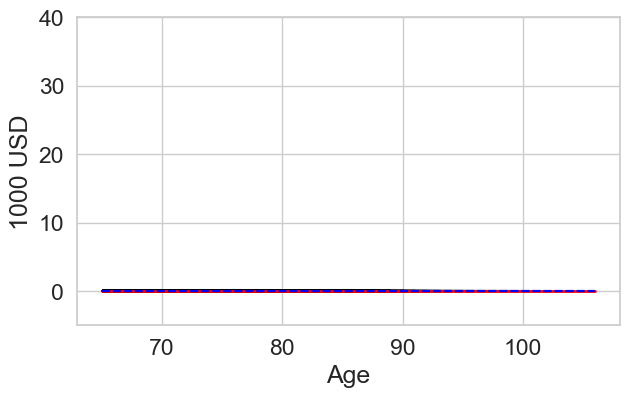

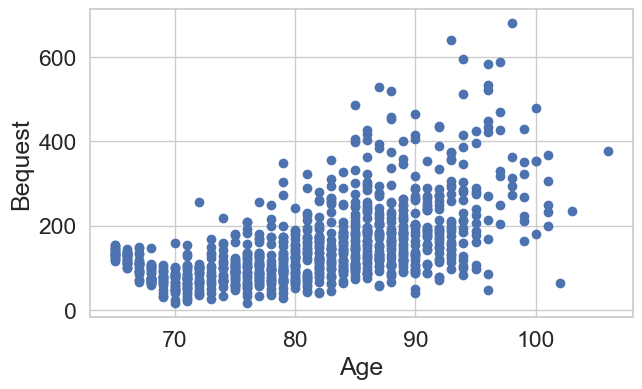

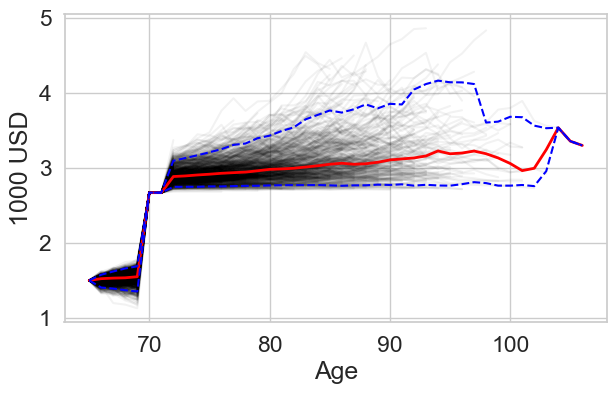

In [101]:
summarize(simulation_4p, save='4p_lower', target=c0, verbose=False, y_min=19, y_max=21, limits=limits)

In [34]:
simulation_MPC.bequests.to_csv('cache/MPC_lower_bequests.csv')
pd.Series(simulation_MPC.cash_matrix.values.flatten()).dropna().to_csv('cache/MPC_lower_cash.csv')

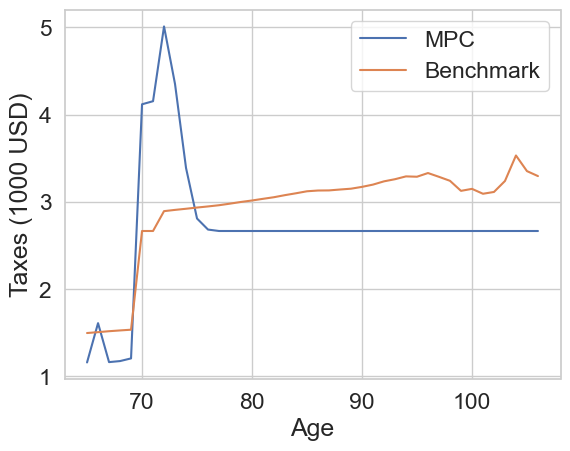

In [17]:
save = 'lower'
simulation_MPC.tau_realized_matrix.mean(axis=1).plot(label='MPC')
simulation_4p.tau_realized_matrix.mean(axis=1).plot(label='Benchmark')
# simulation_MPC_collar.tau_realized_matrix.mean(axis=1).plot(label='MPC with collar')
plt.ylabel('Taxes (1000 USD)')
plt.xlabel('Age')
plt.legend();
plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/taxes_{save}.png', bbox_inches='tight')